In [3]:
from Metaheuristicas.fitness_functions import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [5]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [6]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [7]:
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [8]:
n = 500

In [9]:
from Metaheuristicas.Ant_Colony_Optimization import AdvancedBinaryAntColonyOptimization

aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.8, alpha=1, beta=2,
                                          local_search_prob=0.15)

#### Models Naive Bayes and Decision Tree

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ABACO with Mutual Information


In [11]:
#TODO: checar parametros
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)
bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=mutual_information_eval)
ACMIFeatures = X.columns[bestfeatures.astype(bool)].tolist()


In [12]:
NB.fit(X_train[ACMIFeatures], y_train)

y_pred = NB.predict(X_test[ACMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9505813953488372
Precision: 0.6153846153846154
Recall: 0.6956521739130435
F1: 0.6530612244897959
AUC: 0.8322497629689828


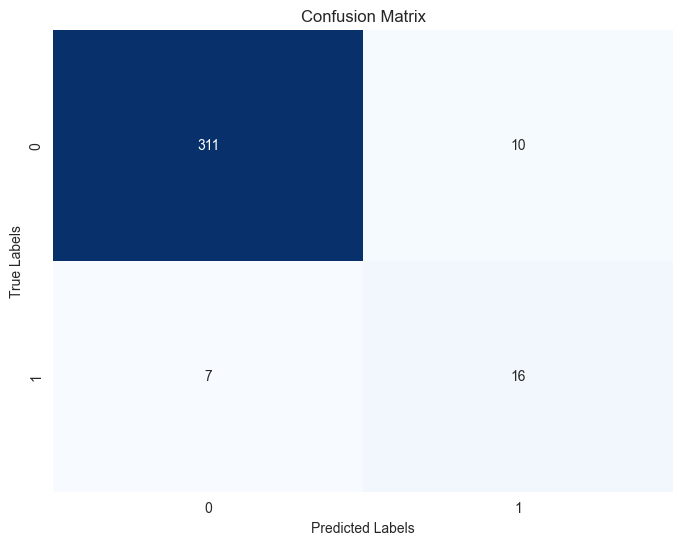

In [13]:
%matplotlib inline
confusion_matrix_heatmap(y_test, y_pred)

In [14]:
DT.fit(X_train[ACMIFeatures], y_train)

y_pred = DT.predict(X_test[ACMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9622093023255814
Precision: 0.7777777777777778
Recall: 0.6086956521739131
F1: 0.6829268292682927
AUC: 0.798117296491941


In [15]:
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

In [16]:
%matplotlib inline
confusion_matrix_heatmap(y_test, y_pred)

# ABACO with Chi2

In [17]:
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)

bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=chi2_eval)
ACX2Features = X.columns[bestfeatures.astype(bool)].tolist()

In [18]:
NB.fit(X_train[ACX2Features], y_train)
y_pred = NB.predict(X_test[ACX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9593023255813954
Precision: 0.6666666666666666
Recall: 0.782608695652174
F1: 0.72
AUC: 0.8772856562373018


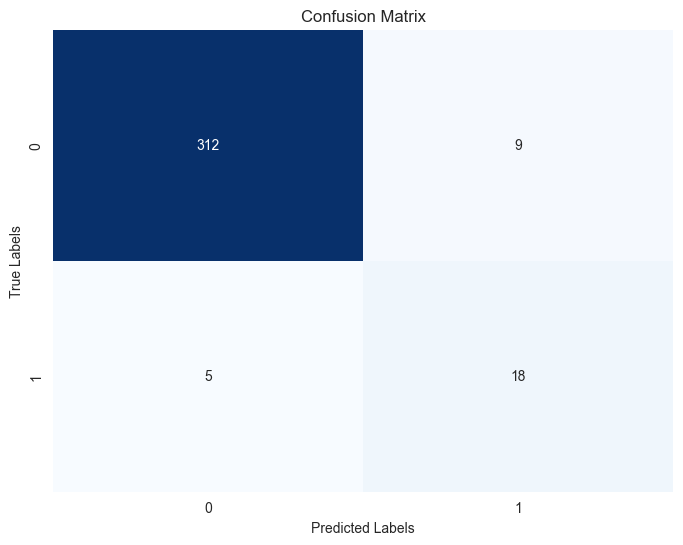

In [19]:
confusion_matrix_heatmap(y_test, y_pred)

In [20]:
DT.fit(X_train[ACX2Features], y_train)
y_pred = DT.predict(X_test[ACX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9622093023255814
Precision: 0.75
Recall: 0.6521739130434783
F1: 0.6976744186046512
AUC: 0.8182987945279697


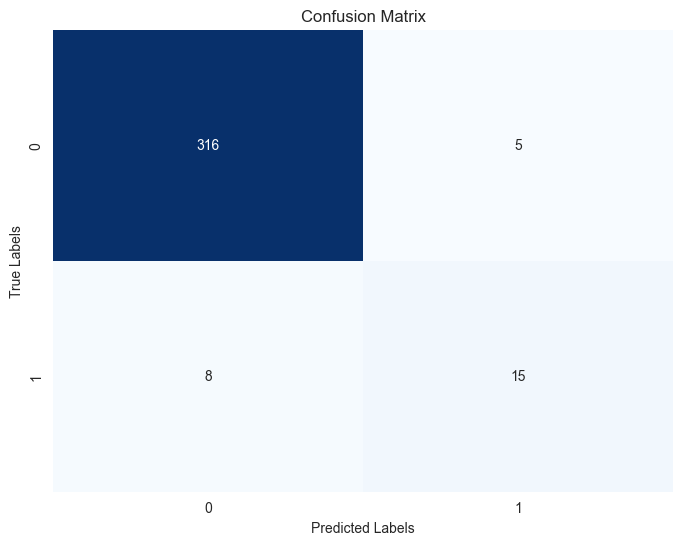

In [21]:
confusion_matrix_heatmap(y_test, y_pred)

# ABACO with ReliefF

In [22]:
aco = AdvancedBinaryAntColonyOptimization(n_ants=20, n_best=1, n_iterations=n, decay=0.6, alpha=1, beta=2,local_search_prob=0.15)

bestfeatures, best_fitness = aco.fit(X.values, y.values, fitness_function=relieff_eval)
ACRFeatures = X.columns[bestfeatures.astype(bool)].tolist()

In [23]:
NB.fit(X_train[ACRFeatures], y_train)
y_pred = NB.predict(X_test[ACRFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9098837209302325
Precision: 0.39473684210526316
Recall: 0.6521739130434783
F1: 0.49180327868852464
AUC: 0.7902614113503995


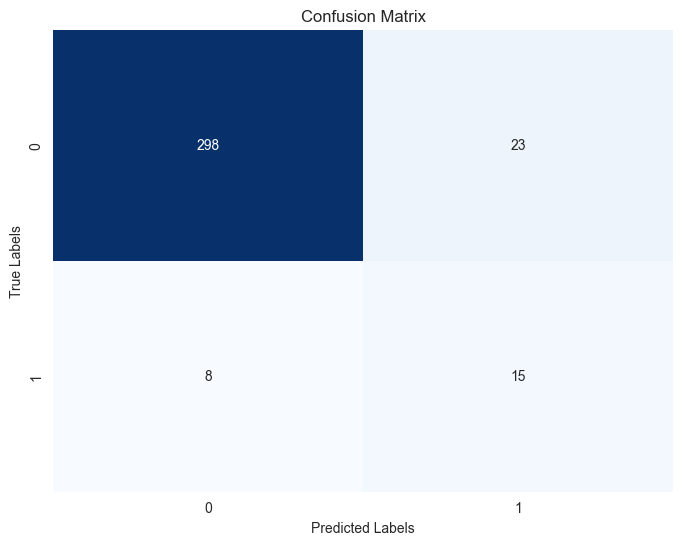

In [24]:
confusion_matrix_heatmap(y_test, y_pred)

In [25]:
DT.fit(X_train[ACRFeatures], y_train)
y_pred = DT.predict(X_test[ACRFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9593023255813954
Precision: 0.7368421052631579
Recall: 0.6086956521739131
F1: 0.6666666666666666
AUC: 0.796559664093187


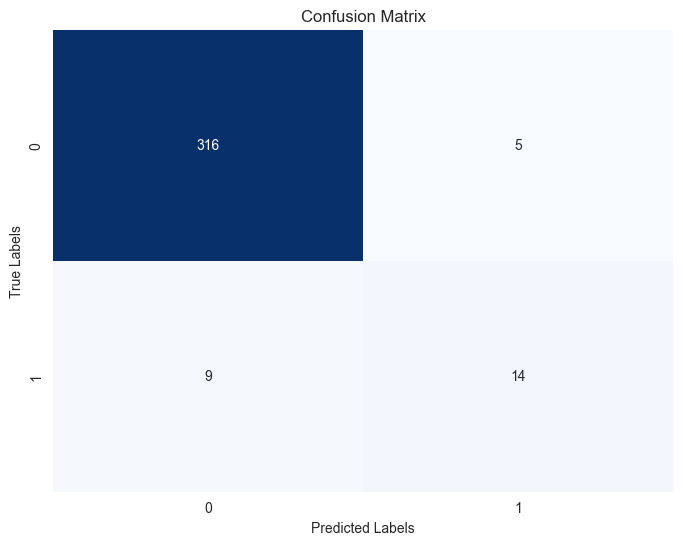

In [26]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [27]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [28]:


# Crear y compilar el modelo
RN = Sequential()

# Definir la dimensión de entrada basada en las características seleccionadas
input_dim = X_train[ACMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

# Entrenar el modelo
history = RN.fit(X_train[ACMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = RN.evaluate(X_test[ACMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')

# Realizar predicciones en el conjunto de prueba
y_pred_prob = RN.predict(X_test[ACMIFeatures])  # Predicciones como probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas (0 o 1)

# Calcular y mostrar las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))  # Usamos probabilidades para AUC
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


Epoch 1/100
20/20 [==============================] - 1s 7ms/step - loss: 0.7504 - accuracy: 0.4578 - val_loss: 0.4876 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8984 - val_loss: 0.3127 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8984 - val_loss: 0.2678 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8984 - val_loss: 0.2342 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9016 - val_loss: 0.2021 - val_accuracy: 0.9193
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9047 - val_loss: 0.1758 - val_accuracy: 0.9255
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9297 - val_loss: 0.1554 - val_accuracy: 0.9317
Epoch 8/100
2

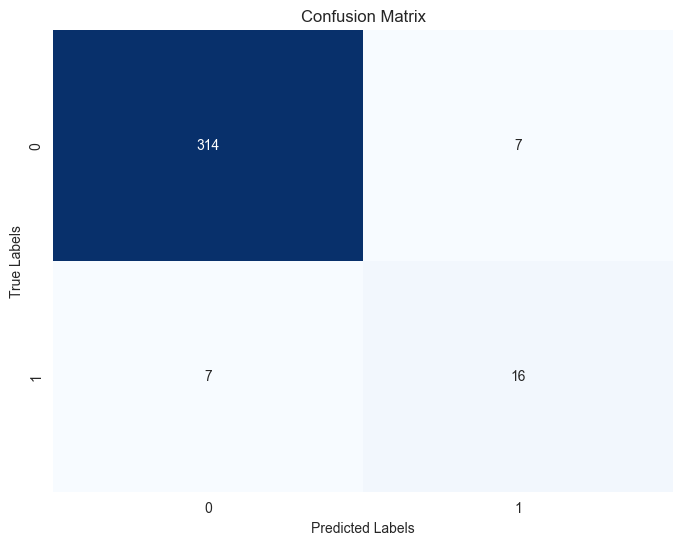

In [29]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [30]:

RN = Sequential()

input_dim = X_train[ACX2Features].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[ACX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[ACX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[ACX2Features])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.8766 - val_loss: 0.3289 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8984 - val_loss: 0.2572 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9000 - val_loss: 0.2170 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9125 - val_loss: 0.1757 - val_accuracy: 0.9317
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9438 - val_loss: 0.1406 - val_accuracy: 0.9379
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9484 - val_loss: 0.1178 - val_accuracy: 0.9565
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9516 - val_loss: 0.1032 - val_accuracy: 0.9627
Epoch 8/100
2

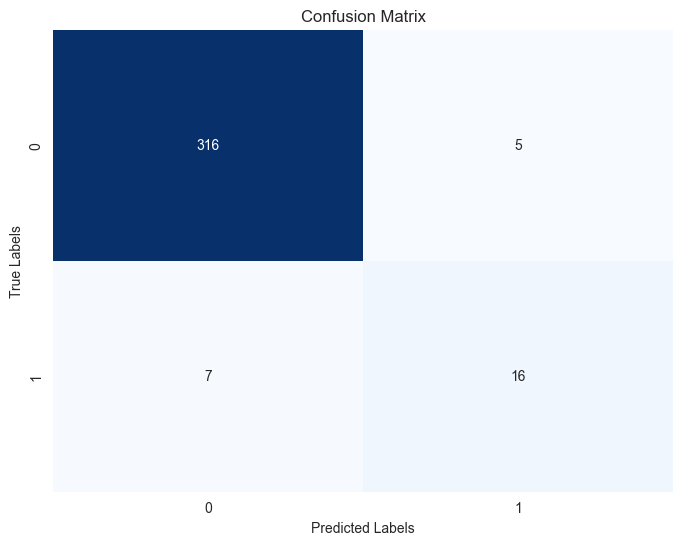

In [31]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [32]:
RN = Sequential()

input_dim = X_train[ACRFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[ACRFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[ACRFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[ACRFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.7953 - val_loss: 0.4671 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8984 - val_loss: 0.3226 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8984 - val_loss: 0.2840 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8984 - val_loss: 0.2725 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8984 - val_loss: 0.2571 - val_accuracy: 0.9193
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.9031 - val_loss: 0.2431 - val_accuracy: 0.9193
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9062 - val_loss: 0.2248 - val_accuracy: 0.9255
Epoch 8/100
2

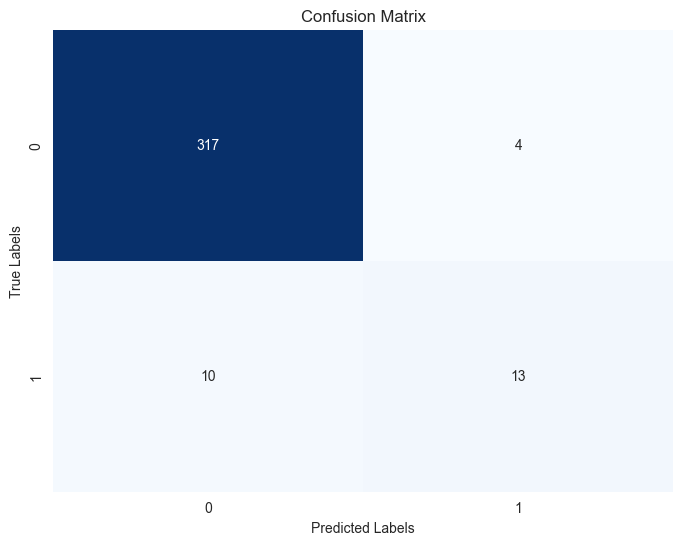

In [33]:
confusion_matrix_heatmap(y_test, y_pred)

,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.950581,0.615385,0.695652,0.653061,0.83225
X2,0.959302,0.666667,0.782609,0.72,0.877286
Relief,0.909884,0.394737,0.652174,0.491803,0.790261


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.962209,0.777778,0.608696,0.682927,0.798117
X2,0.962209,0.75,0.652174,0.697674,0.818299
Relief,0.959302,0.736842,0.608696,0.666667,0.79656


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.959302,0.695652,0.695652,0.695652,0.981444
X2,0.965116,0.761905,0.695652,0.727273,0.982934
Relief,0.959302,0.764706,0.565217,0.65,0.94704
